In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
# load the dataset
df = pd.read_csv('datasets/mushrooms.csv')

print(df.shape)
print(df.dtypes)
print(df.head(10))
print(df)

(8124, 23)
class                       object
cap-shape                   object
cap-surface                 object
cap-color                   object
bruises                     object
odor                        object
gill-attachment             object
gill-spacing                object
gill-size                   object
gill-color                  object
stalk-shape                 object
stalk-root                  object
stalk-surface-above-ring    object
stalk-surface-below-ring    object
stalk-color-above-ring      object
stalk-color-below-ring      object
veil-type                   object
veil-color                  object
ring-number                 object
ring-type                   object
spore-print-color           object
population                  object
habitat                     object
dtype: object
  class cap-shape cap-surface cap-color bruises odor gill-attachment  \
0     p         x           s         n       t    p               f   
1     e         x         

In [3]:
# how many edibles vs poisonous shrooms do we have
counts = df.groupby('class')['class'].count()
print(counts)

class
e    4208
p    3916
Name: class, dtype: int64


In [4]:
df['ring-number'] = np.where(df['ring-number'] == 'o', 1,
                               np.where(df['ring-number'] == 'n', 0, 2))
df

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,1,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,1,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,1,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,1,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,1,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,1,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,1,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,1,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,1,e,w,v,l


In [5]:

# edible mushrooms appear to have a slighly higher number of rings, probably not significant...
df.groupby('class')['ring-number'].mean()

class
e    1.125475
p    1.009193
Name: ring-number, dtype: float64

In [6]:
df.groupby('class')['ring-number'].mean()
# there are almost no mushrooms with 0 rings, but all 36 that exist are posonous! Most of mushrooms have one ring.
# if there are 2 ring numbers it can also help a lot, since most 2 ringed shrooms are edible
print(df.groupby(['class', 'ring-number'])['ring-number'].count())

class  ring-number
e      1              3680
       2               528
p      0                36
       1              3808
       2                72
Name: ring-number, dtype: int64


In [57]:
print(df.groupby(['class','cap-shape'])['cap-shape'].count())

class  cap-shape
e      b             404
       f            1596
       k             228
       s              32
       x            1948
p      b              48
       c               4
       f            1556
       k             600
       x            1708
Name: cap-shape, dtype: int64


In [8]:
# evanescent does not distinguish that much between poisonous or edible shrooms
# flaring ring type is for sure edible
# large is a huge dataset which can only lead to shroom being poisonous
# none is also poisonous but we concluded that from previous dataset
# pendant in most cases leads to shroom being edible
# other ring types were not included
print(df.groupby(['class','ring-type'])['ring-type'].count())

class  ring-type
e      e            1008
       f              48
       p            3152
p      e            1768
       l            1296
       n              36
       p             816
Name: ring-type, dtype: int64


In [9]:
# this helps to further distinguish between evanescent shrooms
# 2 ring numbers on evanescence ring mean edible shroom for sure
print(df.groupby(['class','ring-type','ring-number'])['class'].count())

class  ring-type  ring-number
e      e          1               816
                  2               192
       f          1                48
       p          1              2816
                  2               336
p      e          1              1768
       l          1              1296
       n          0                36
       p          1               744
                  2                72
Name: class, dtype: int64


In [10]:
# this pretty didnt help at all
# veil type is same for every group so we could delete this column
print(df.groupby(['class','veil-type'])['veil-type'].count())

class  veil-type
e      p            4208
p      p            3916
Name: veil-type, dtype: int64


In [11]:
# this helped to distinguis between some colors
# white doesnt tell much
# brown and orange is for sure edible
# yellow is poisonous for sure
print(df.groupby(['class','habitat'])['habitat'].count())

class  habitat
e      d          1880
       g          1408
       l           240
       m           256
       p           136
       u            96
       w           192
p      d          1268
       g           740
       l           592
       m            36
       p          1008
       u           272
Name: habitat, dtype: int64


Text(0.5, 1.0, 'Distribution of stalk-color-above-ring in edible mushrooms (w - white, e - red, g - gray, n - brown, o - ornage, p - pink)')

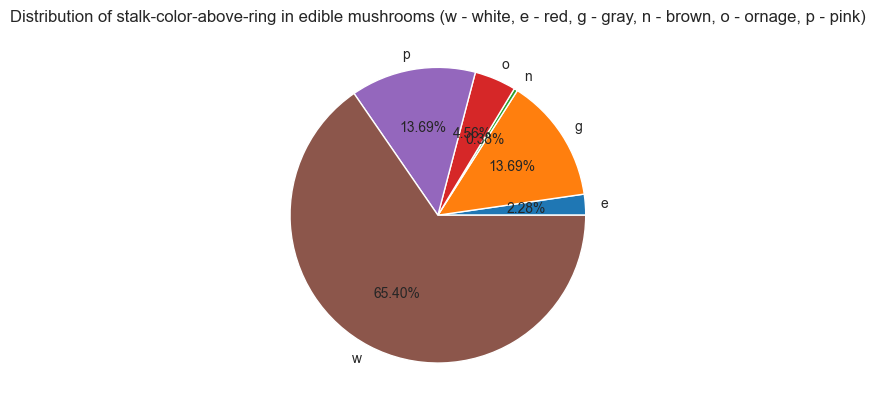

In [21]:

agg = df.groupby(['class','stalk-color-above-ring'])['stalk-color-above-ring'].count()
df_ = agg.to_frame()
df_['count'] = df_['stalk-color-above-ring']
df_['class'] = df_.index.get_level_values(0)
df_['stalk-color-above-ring'] = df_.index.get_level_values(1)
df_ = df_.reset_index(drop=True)
df_p = df_[df_['class'] == 'p'].reset_index(drop=True)
df_e = df_[df_['class'] == 'e'].reset_index(drop=True)
df_p['perc'] = df_p['count'] / df_p['count'].sum()
df_e['perc'] = df_e['count'] / df_e['count'].sum()
plt.pie(x='perc', labels='stalk-color-above-ring', data=df_e, autopct='%.2f%%')
plt.title('Distribution of stalk-color-above-ring in edible mushrooms (w - white, e - red, g - gray, n - brown, o - ornage, p - pink)')

Text(0.5, 1.0, 'Distribution of stalk-color-above-ring in poisonous mushrooms (w - white, y - yellow, b - buff, c - cinnamon, n - brown, p - pink)')

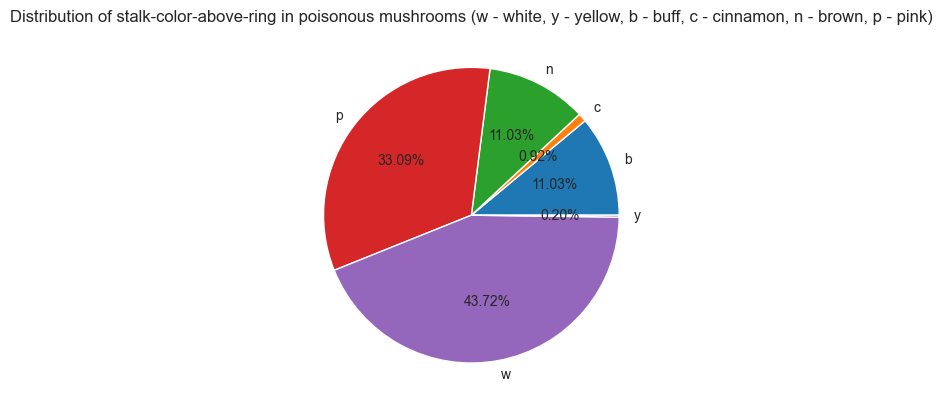

In [22]:
plt.pie(x='perc', labels='stalk-color-above-ring', data=df_p, autopct='%.2f%%')
plt.title('Distribution of stalk-color-above-ring in poisonous mushrooms (w - white, y - yellow, b - buff, c - cinnamon, n - brown, p - pink)')

In [14]:
# this helped quite a bit
# buff color is edible for sure
# chocolate is almost for certain poisonous
# black on the other hand is almost for certain edible
# green is only poisonous
print(df.groupby(['class','spore-print-color'])['spore-print-color'].count())

class  spore-print-color
e      b                      48
       h                      48
       k                    1648
       n                    1744
       o                      48
       u                      48
       w                     576
       y                      48
p      h                    1584
       k                     224
       n                     224
       r                      72
       w                    1812
Name: spore-print-color, dtype: int64


In [15]:
# abundant is edible
# numerous also
# others are unimportant
print(df.groupby(['class','population'])['population'].count())

class  population
e      a              384
       c              288
       n              400
       s              880
       v             1192
       y             1064
p      c               52
       s              368
       v             2848
       y              648
Name: population, dtype: int64


In [16]:
# along the paths is poisonous shrooms almost for sure
# on the other hand waste shrooms are always edible
print(df.groupby(['class','habitat'])['habitat'].count())

class  habitat
e      d          1880
       g          1408
       l           240
       m           256
       p           136
       u            96
       w           192
p      d          1268
       g           740
       l           592
       m            36
       p          1008
       u           272
Name: habitat, dtype: int64


In [17]:
print(df.groupby(['class','habitat'])['habitat'].count())

class  habitat
e      d          1880
       g          1408
       l           240
       m           256
       p           136
       u            96
       w           192
p      d          1268
       g           740
       l           592
       m            36
       p          1008
       u           272
Name: habitat, dtype: int64


Text(0.5, 1.0, 'Distribution of veil-type in edible mushrooms (w - white, e - red, g - gray, n - brown, o - ornage, p - pink)')

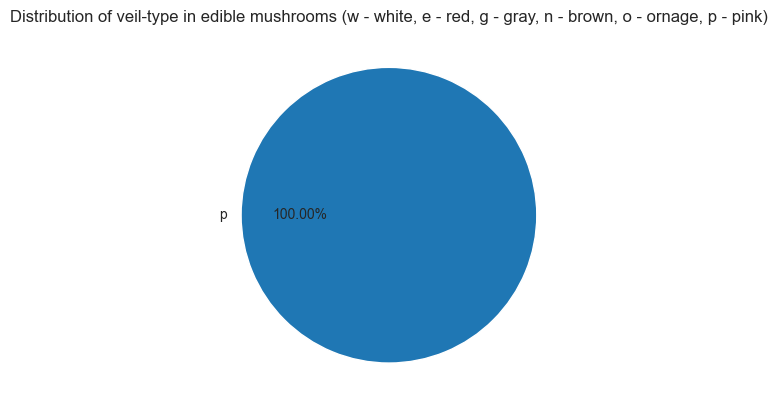

In [25]:
# some graphs for visualisation of our dataset
# veil-type for edible shrooms
agg = df.groupby(['class','veil-type'])['veil-type'].count()
df_ = agg.to_frame()
df_['count'] = df_['veil-type']
df_['class'] = df_.index.get_level_values(0)
df_['veil-type'] = df_.index.get_level_values(1)
df_ = df_.reset_index(drop=True)
df_p = df_[df_['class'] == 'p'].reset_index(drop=True)
df_e = df_[df_['class'] == 'e'].reset_index(drop=True)
df_p['perc'] = df_p['count'] / df_p['count'].sum()
df_e['perc'] = df_e['count'] / df_e['count'].sum()
plt.pie(x='perc', labels='veil-type', data=df_e, autopct='%.2f%%')
plt.title('Distribution of veil-type in edible mushrooms (p - partial)')

Text(0.5, 1.0, 'Distribution of veil-type in poisonous mushrooms (p - partial)')

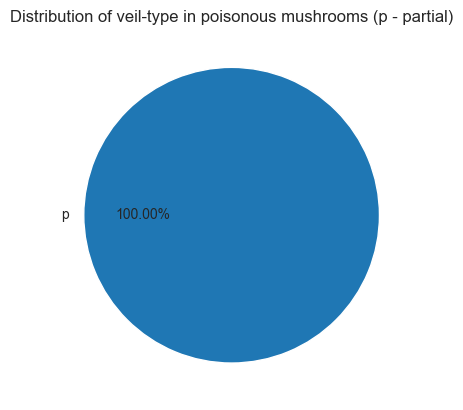

In [27]:
# veil-type for poisonous shrooms
plt.pie(x='perc', labels='veil-type', data=df_p, autopct='%.2f%%')
plt.title('Distribution of veil-type in poisonous mushrooms (p - partial)')

Text(0.5, 1.0, 'Distribution of veil-color in edible mushrooms (w - white, n - brown, o - orange)')

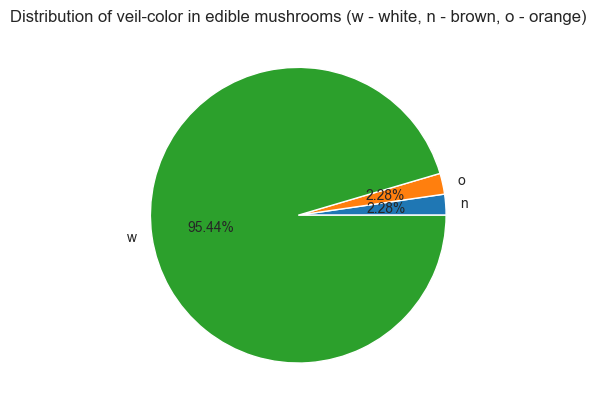

In [29]:
# veil-color for edible shrooms
agg = df.groupby(['class','veil-color'])['veil-color'].count()
df_ = agg.to_frame()
df_['count'] = df_['veil-color']
df_['class'] = df_.index.get_level_values(0)
df_['veil-color'] = df_.index.get_level_values(1)
df_ = df_.reset_index(drop=True)
df_p = df_[df_['class'] == 'p'].reset_index(drop=True)
df_e = df_[df_['class'] == 'e'].reset_index(drop=True)
df_p['perc'] = df_p['count'] / df_p['count'].sum()
df_e['perc'] = df_e['count'] / df_e['count'].sum()
plt.pie(x='perc', labels='veil-color', data=df_e, autopct='%.2f%%')
plt.title('Distribution of veil-color in edible mushrooms (w - white, n - brown, o - orange)')

Text(0.5, 1.0, 'Distribution of veil-color in poisonous mushrooms (w - white, y - yellow)')

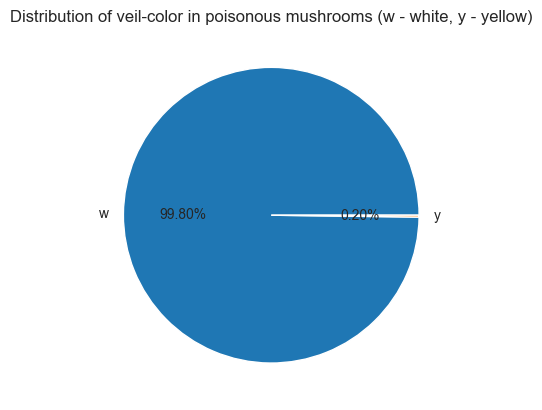

In [31]:
# veil-color for poisonous shrooms
plt.pie(x='perc', labels='veil-color', data=df_p, autopct='%.2f%%')
plt.title('Distribution of veil-color in poisonous mushrooms (w - white, y - yellow)')

Text(0.5, 1.0, 'Distribution of ring-number in edible mushrooms (w - white, n - brown, o - orange)')

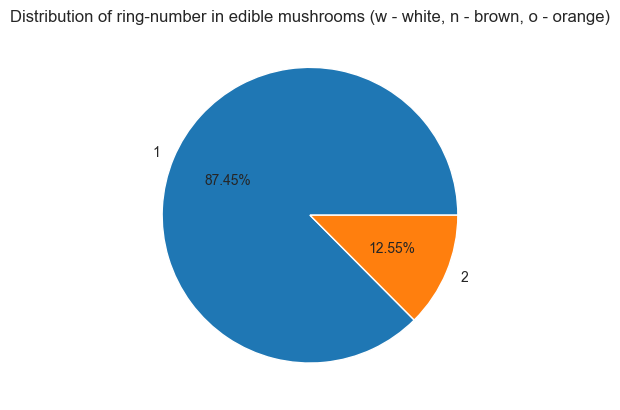

In [34]:
# ring number for edible shrooms
agg = df.groupby(['class','ring-number'])['ring-number'].count()
df_ = agg.to_frame()
df_['count'] = df_['ring-number']
df_['class'] = df_.index.get_level_values(0)
df_['ring-number'] = df_.index.get_level_values(1)
df_ = df_.reset_index(drop=True)
df_p = df_[df_['class'] == 'p'].reset_index(drop=True)
df_e = df_[df_['class'] == 'e'].reset_index(drop=True)
df_p['perc'] = df_p['count'] / df_p['count'].sum()
df_e['perc'] = df_e['count'] / df_e['count'].sum()
plt.pie(x='perc', labels='ring-number', data=df_e, autopct='%.2f%%')
plt.title('Distribution of ring-number in edible mushrooms')

Text(0.5, 1.0, 'Distribution of ring-number in poisonous mushrooms (w - white, y - yellow)')

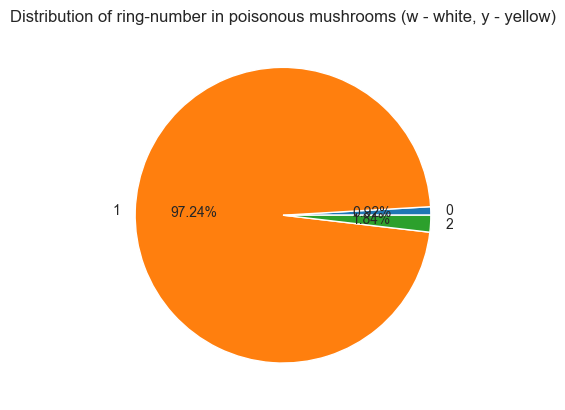

In [35]:
# ring number for poisonous shrooms
plt.pie(x='perc', labels='ring-number', data=df_p, autopct='%.2f%%')
plt.title('Distribution of ring-number in poisonous mushrooms')

Text(0.5, 1.0, 'Distribution of ring-type in edible mushrooms (w - white, n - brown, o - orange)')

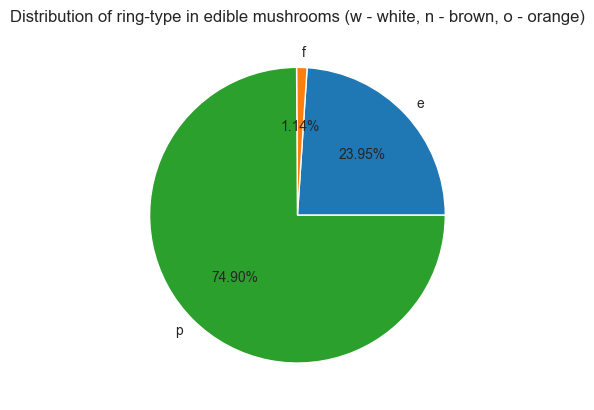

In [36]:
# ring-type for edible shrooms
agg = df.groupby(['class','ring-type'])['ring-type'].count()
df_ = agg.to_frame()
df_['count'] = df_['ring-type']
df_['class'] = df_.index.get_level_values(0)
df_['ring-type'] = df_.index.get_level_values(1)
df_ = df_.reset_index(drop=True)
df_p = df_[df_['class'] == 'p'].reset_index(drop=True)
df_e = df_[df_['class'] == 'e'].reset_index(drop=True)
df_p['perc'] = df_p['count'] / df_p['count'].sum()
df_e['perc'] = df_e['count'] / df_e['count'].sum()
plt.pie(x='perc', labels='ring-type', data=df_e, autopct='%.2f%%')
plt.title('Distribution of ring-type in edible mushrooms (p - pendant, f - flaring, e - evanescent)')

Text(0.5, 1.0, 'Distribution of ring-type in poisonous mushrooms (e - evanescent, p - pendant, n - none, l - large)')

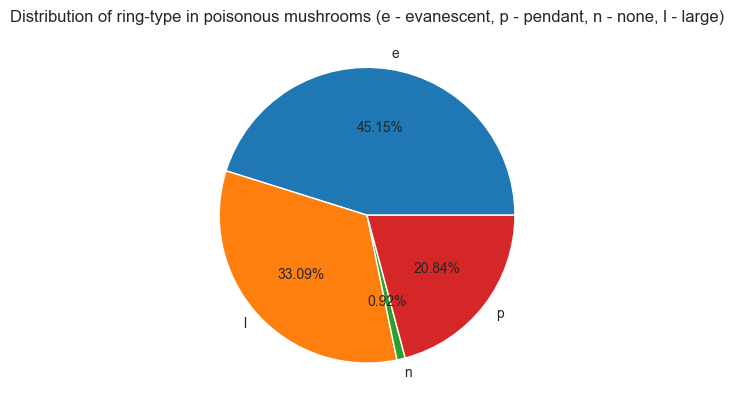

In [38]:
# ring-type poisonous shrooms
plt.pie(x='perc', labels='ring-type', data=df_p, autopct='%.2f%%')
plt.title('Distribution of ring-type in poisonous mushrooms (e - evanescent, p - pendant, n - none, l - large)')

Text(0.5, 1.0, 'Distribution of spore-print-color in edible mushrooms (k - black, n - none, o - orange, u - purple, w - white, y - yellow, b - buff, h - chocolate)')

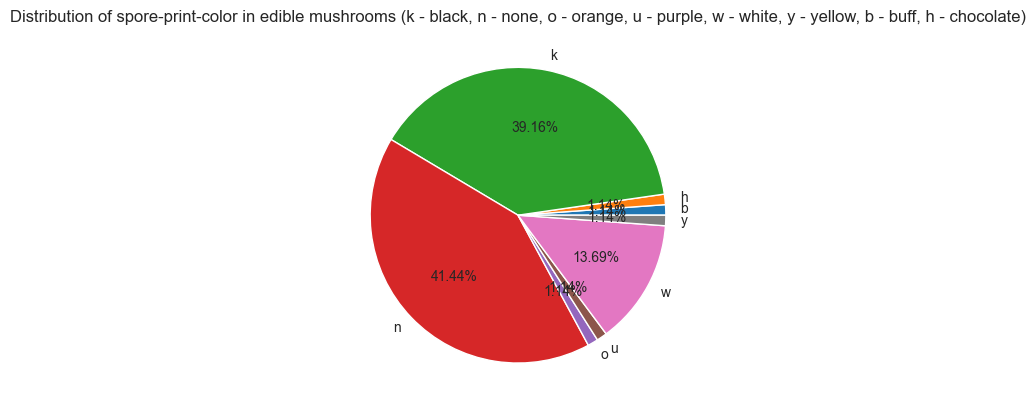

In [40]:
# spore-print-color for edible shrooms
agg = df.groupby(['class','spore-print-color'])['spore-print-color'].count()
df_ = agg.to_frame()
df_['count'] = df_['spore-print-color']
df_['class'] = df_.index.get_level_values(0)
df_['spore-print-color'] = df_.index.get_level_values(1)
df_ = df_.reset_index(drop=True)
df_p = df_[df_['class'] == 'p'].reset_index(drop=True)
df_e = df_[df_['class'] == 'e'].reset_index(drop=True)
df_p['perc'] = df_p['count'] / df_p['count'].sum()
df_e['perc'] = df_e['count'] / df_e['count'].sum()
plt.pie(x='perc', labels='spore-print-color', data=df_e, autopct='%.2f%%')
plt.title('Distribution of spore-print-color in edible mushrooms (k - black, n - none, o - orange, u - purple, w - white, y - yellow, b - buff, h - chocolate)')

Text(0.5, 1.0, 'Distribution of spore-print-color in poisonous mushrooms (k - black, n - none, w - white, h - chocolate, r - green)')

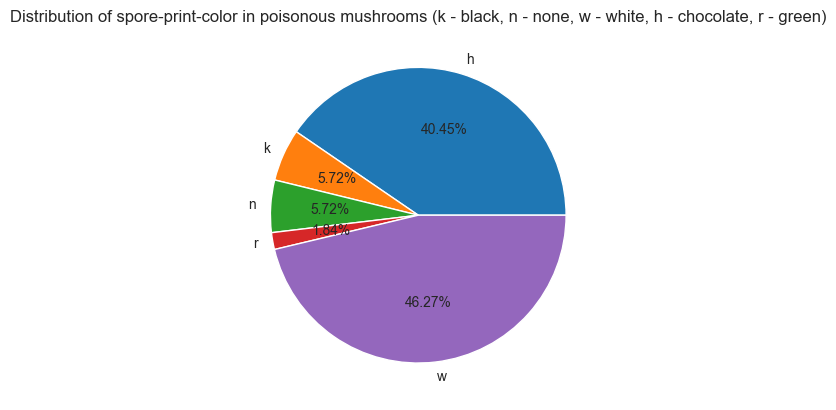

In [42]:
# spore-print-color poisonous shrooms
plt.pie(x='perc', labels='spore-print-color', data=df_p, autopct='%.2f%%')
plt.title('Distribution of spore-print-color in poisonous mushrooms (k - black, n - none, w - white, h - chocolate, r - green)')

Text(0.5, 1.0, 'Distribution of habitat in edible mushrooms (g - grasses, l - leaves, m - meadows, p - paths, u - urban, w - waste, d - woods)')

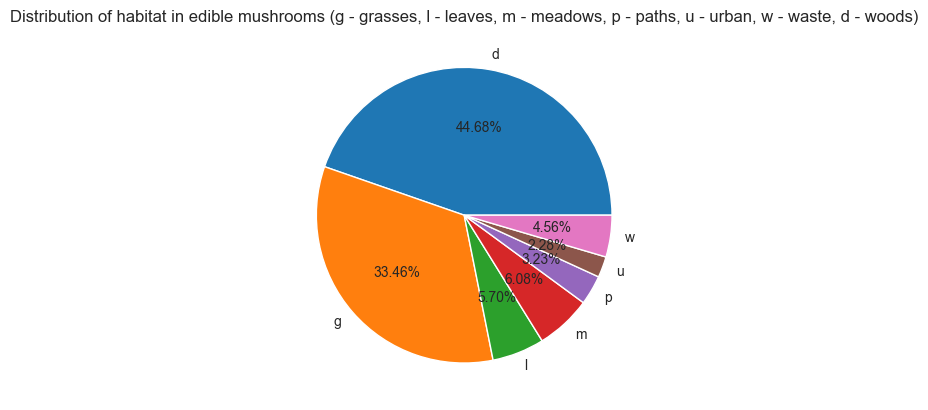

In [44]:
# habitat for edible shrooms
agg = df.groupby(['class','habitat'])['habitat'].count()
df_ = agg.to_frame()
df_['count'] = df_['habitat']
df_['class'] = df_.index.get_level_values(0)
df_['habitat'] = df_.index.get_level_values(1)
df_ = df_.reset_index(drop=True)
df_p = df_[df_['class'] == 'p'].reset_index(drop=True)
df_e = df_[df_['class'] == 'e'].reset_index(drop=True)
df_p['perc'] = df_p['count'] / df_p['count'].sum()
df_e['perc'] = df_e['count'] / df_e['count'].sum()
plt.pie(x='perc', labels='habitat', data=df_e, autopct='%.2f%%')
plt.title('Distribution of habitat in edible mushrooms (g - grasses, l - leaves, m - meadows, p - paths, u - urban, w - waste, d - woods)')

Text(0.5, 1.0, 'Distribution of habitat in poisonous mushrooms (g - grasses, l - leaves, m - meadows, p - paths, u - urban)')

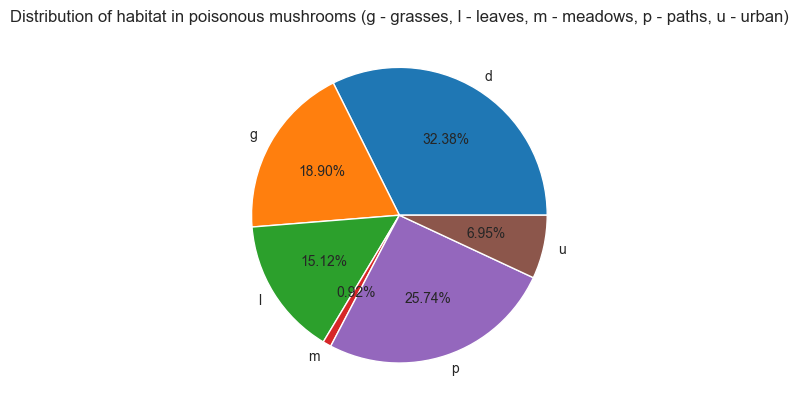

In [47]:
# habitat poisonous shrooms
plt.pie(x='perc', labels='habitat', data=df_p, autopct='%.2f%%')
plt.title('Distribution of habitat in poisonous mushrooms (g - grasses, l - leaves, m - meadows, p - paths, u - urban)')

Text(0.5, 1.0, 'Distribution of population in edible mushrooms (a - abundant, c - clustered, n - numerous, s - scattered, v - several, y - solitary')

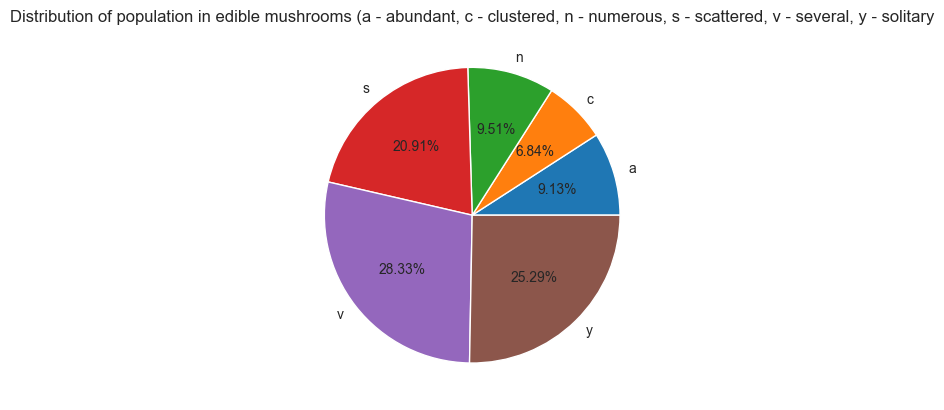

In [49]:
# population for edible shrooms
agg = df.groupby(['class','population'])['population'].count()
df_ = agg.to_frame()
df_['count'] = df_['population']
df_['class'] = df_.index.get_level_values(0)
df_['population'] = df_.index.get_level_values(1)
df_ = df_.reset_index(drop=True)
df_p = df_[df_['class'] == 'p'].reset_index(drop=True)
df_e = df_[df_['class'] == 'e'].reset_index(drop=True)
df_p['perc'] = df_p['count'] / df_p['count'].sum()
df_e['perc'] = df_e['count'] / df_e['count'].sum()
plt.pie(x='perc', labels='population', data=df_e, autopct='%.2f%%')
plt.title('Distribution of population in edible mushrooms (a - abundant, c - clustered, n - numerous, s - scattered, v - several, y - solitary)')

Text(0.5, 1.0, 'Distribution of population in poisonous mushrooms (c - clustered, s - scattered, v - several, y - solitary)')

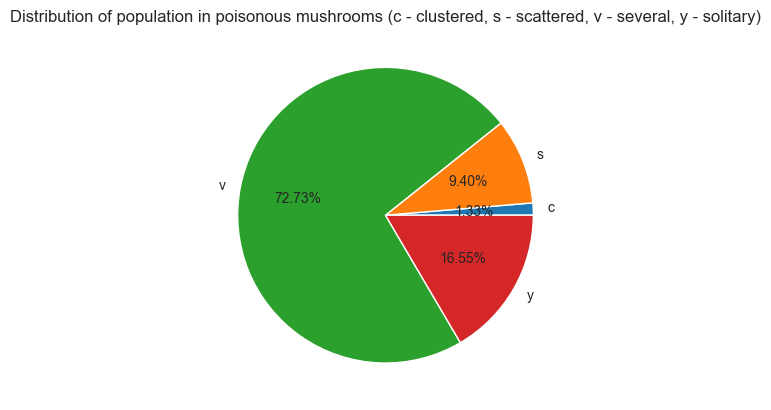

In [52]:
# population poisonous shrooms
plt.pie(x='perc', labels='population', data=df_p, autopct='%.2f%%')
plt.title('Distribution of population in poisonous mushrooms (c - clustered, s - scattered, v - several, y - solitary)')

Text(0.5, 1.0, 'Distribution of stalk-color-below-ring in edible mushrooms (n - brown, g - gray, e - red, w - white, p - pink, o - orange)')

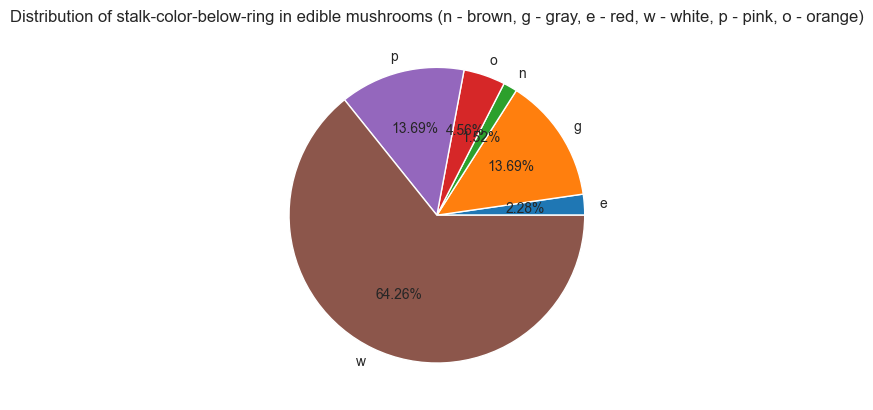

In [54]:
# stalk-color-below-ring for edible shrooms
agg = df.groupby(['class','stalk-color-below-ring'])['stalk-color-below-ring'].count()
df_ = agg.to_frame()
df_['count'] = df_['stalk-color-below-ring']
df_['class'] = df_.index.get_level_values(0)
df_['stalk-color-below-ring'] = df_.index.get_level_values(1)
df_ = df_.reset_index(drop=True)
df_p = df_[df_['class'] == 'p'].reset_index(drop=True)
df_e = df_[df_['class'] == 'e'].reset_index(drop=True)
df_p['perc'] = df_p['count'] / df_p['count'].sum()
df_e['perc'] = df_e['count'] / df_e['count'].sum()
plt.pie(x='perc', labels='stalk-color-below-ring', data=df_e, autopct='%.2f%%')
plt.title('Distribution of stalk-color-below-ring in edible mushrooms (n - brown, g - gray, e - red, w - white, p - pink, o - orange)')

Text(0.5, 1.0, 'Distribution of stalk-color-below-ring in poisonous mushrooms (n - brown, c - cinnamon, y - yellow, w - white, p - pink, b - buff)')

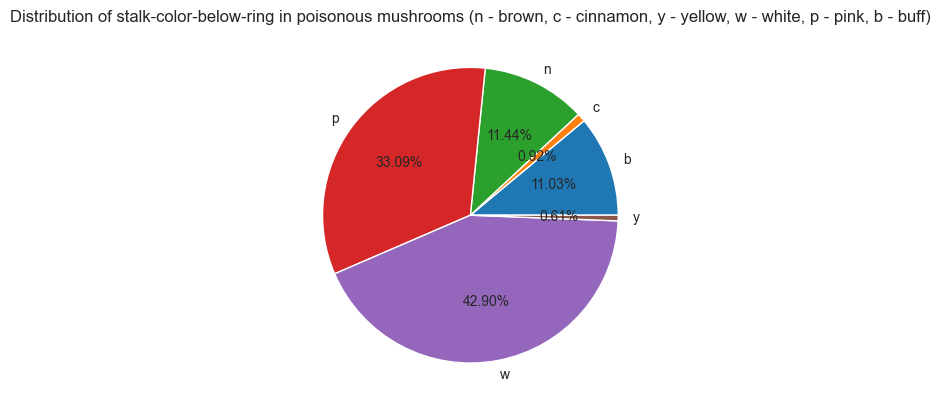

In [56]:
# stalk-color-below-ring poisonous shrooms
plt.pie(x='perc', labels='stalk-color-below-ring', data=df_p, autopct='%.2f%%')
plt.title('Distribution of stalk-color-below-ring in poisonous mushrooms (n - brown, c - cinnamon, y - yellow, w - white, p - pink, b - buff)')

Text(0.5, 1.0, 'Distribution of cap-shape in edible mushrooms (b - bell, x - convex, s - sunken, k - knobbed, f - fibrous)')

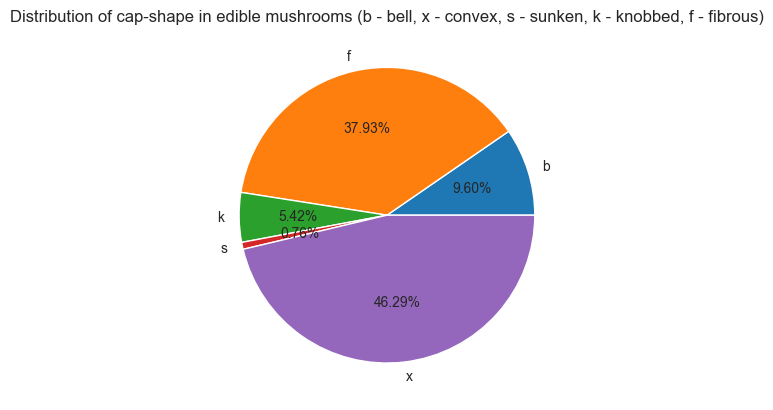

In [59]:
# cap-shape for edible shrooms
agg = df.groupby(['class','cap-shape'])['cap-shape'].count()
df_ = agg.to_frame()
df_['count'] = df_['cap-shape']
df_['class'] = df_.index.get_level_values(0)
df_['cap-shape'] = df_.index.get_level_values(1)
df_ = df_.reset_index(drop=True)
df_p = df_[df_['class'] == 'p'].reset_index(drop=True)
df_e = df_[df_['class'] == 'e'].reset_index(drop=True)
df_p['perc'] = df_p['count'] / df_p['count'].sum()
df_e['perc'] = df_e['count'] / df_e['count'].sum()
plt.pie(x='perc', labels='cap-shape', data=df_e, autopct='%.2f%%')
plt.title('Distribution of cap-shape in edible mushrooms (b - bell, x - convex, s - sunken, k - knobbed, f - fibrous)')

Text(0.5, 1.0, 'Distribution of cap-shape in poisonous mushrooms (b - bell, x - convex, c - conical, k - knobbed, f - fibrous)')

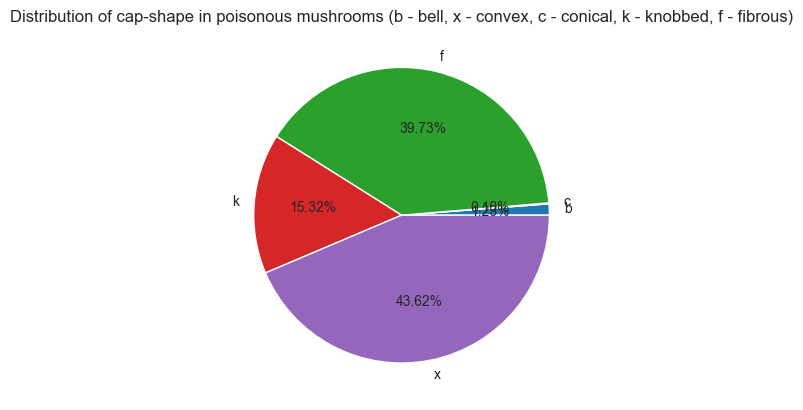

In [61]:
# cap-shape poisonous shrooms
plt.pie(x='perc', labels='cap-shape', data=df_p, autopct='%.2f%%')
plt.title('Distribution of cap-shape in poisonous mushrooms (b - bell, x - convex, c - conical, k - knobbed, f - fibrous)')

Text(0.5, 1.0, 'Distribution of stalk-root in edible mushrooms (b - bulbous, ? - unknown, r - rooted, e - equal, c - club)')

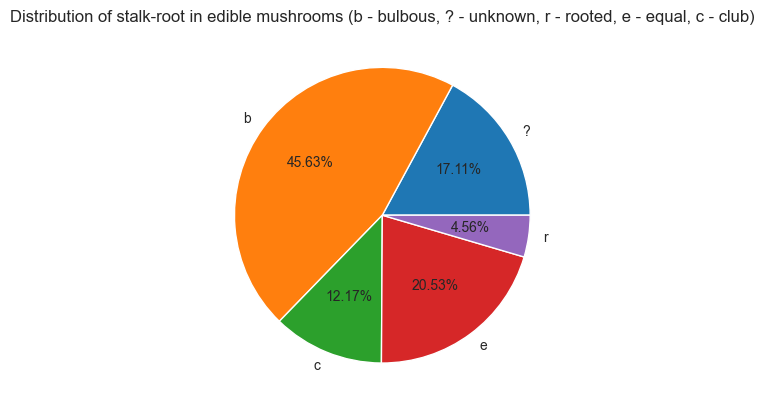

In [66]:
# stalk-root for edible shrooms
agg = df.groupby(['class','stalk-root'])['stalk-root'].count()
df_ = agg.to_frame()
df_['count'] = df_['stalk-root']
df_['class'] = df_.index.get_level_values(0)
df_['stalk-root'] = df_.index.get_level_values(1)
df_ = df_.reset_index(drop=True)
df_p = df_[df_['class'] == 'p'].reset_index(drop=True)
df_e = df_[df_['class'] == 'e'].reset_index(drop=True)
df_p['perc'] = df_p['count'] / df_p['count'].sum()
df_e['perc'] = df_e['count'] / df_e['count'].sum()
plt.pie(x='perc', labels='stalk-root', data=df_e, autopct='%.2f%%')
plt.title('Distribution of stalk-root in edible mushrooms (b - bulbous, ? - unknown, r - rooted, e - equal, c - club)')

Text(0.5, 1.0, 'Distribution of stalk-root in poisonous mushrooms (b - bulbous, ? - unknown, e - equal, c - club)')

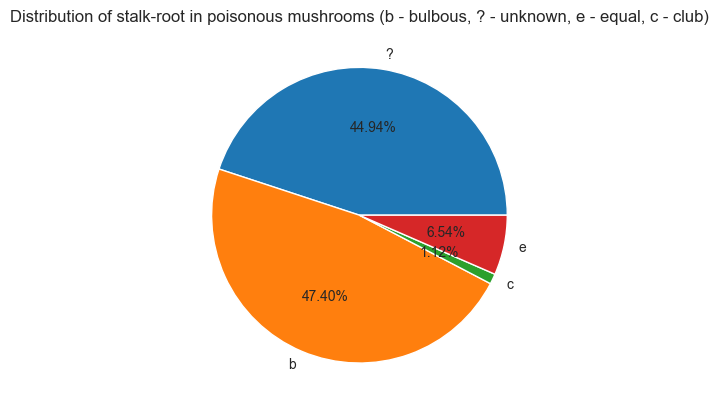

In [68]:
# stalk-root poisonous shrooms
plt.pie(x='perc', labels='stalk-root', data=df_p, autopct='%.2f%%')
plt.title('Distribution of stalk-root in poisonous mushrooms (b - bulbous, ? - unknown, e - equal, c - club)')

Text(0.5, 1.0, 'Distribution of stalk-surface-above-ring in edible mushrooms (s - smooth, y - scaly, f - fibrous, k - silky)')

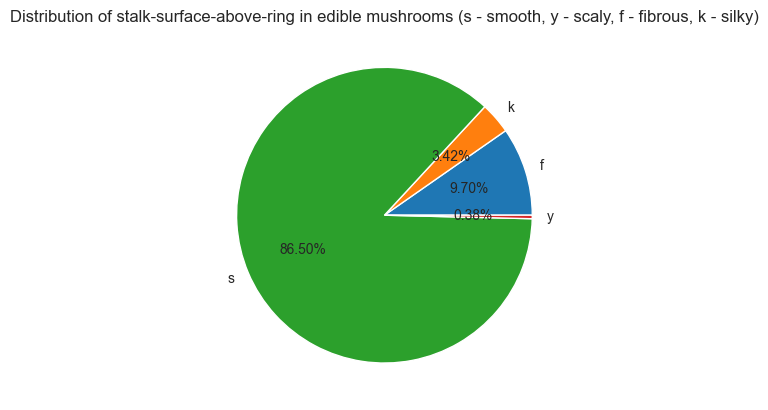

In [72]:
# stalk-surface-above-ring for edible shrooms
agg = df.groupby(['class','stalk-surface-above-ring'])['stalk-surface-above-ring'].count()
df_ = agg.to_frame()
df_['count'] = df_['stalk-surface-above-ring']
df_['class'] = df_.index.get_level_values(0)
df_['stalk-surface-above-ring'] = df_.index.get_level_values(1)
df_ = df_.reset_index(drop=True)
df_p = df_[df_['class'] == 'p'].reset_index(drop=True)
df_e = df_[df_['class'] == 'e'].reset_index(drop=True)
df_p['perc'] = df_p['count'] / df_p['count'].sum()
df_e['perc'] = df_e['count'] / df_e['count'].sum()
plt.pie(x='perc', labels='stalk-surface-above-ring', data=df_e, autopct='%.2f%%')
plt.title('Distribution of stalk-surface-above-ring in edible mushrooms (s - smooth, y - scaly, f - fibrous, k - silky)')

Text(0.5, 1.0, 'Distribution of stalk-surface-above-ring in poisonous mushrooms (s - smooth, y - scaly, f - fibrous, k - silky)')

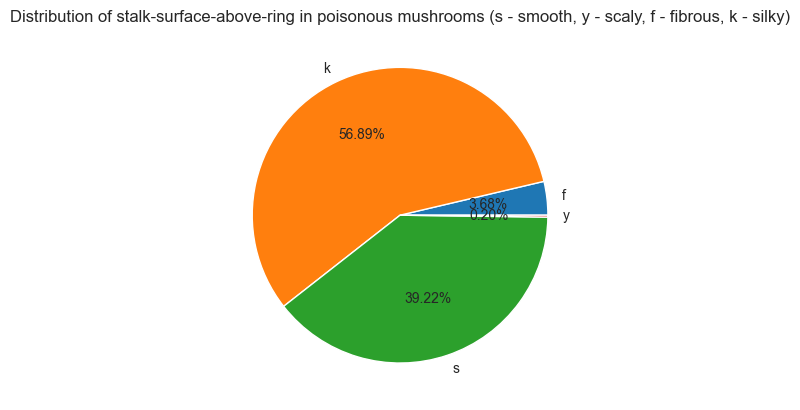

In [73]:
# stalk-surface-above-ring poisonous shrooms
plt.pie(x='perc', labels='stalk-surface-above-ring', data=df_p, autopct='%.2f%%')
plt.title('Distribution of stalk-surface-above-ring in poisonous mushrooms (s - smooth, y - scaly, f - fibrous, k - silky)')